## 6.4 Machine learning part 1

### This script contains the following:

#### 1. Importing libraries and data
#### 2. Data cleaning
#### 3. Data prep for regression analysis
#### 4. Regression analysis
#### Bonus: performance improvement after removing outliers

### 1. Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
path = 'C:/Users/arsla/Gun_violance/'

In [4]:
df = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'gun.csv'))

#### data cleaning

In [5]:
df.head()

,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,...,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district
0,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,http://www.gunviolencearchive.org/incident/461105,http://www.post-gazette.com/local/south/2013/0...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,0::Julian Sims,NaN,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://pittsburgh.cbslocal.com/2013/01/01/4-pe...,NaN,NaN
1,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,http://www.gunviolencearchive.org/incident/460726,http://www.dailybulletin.com/article/zz/201301...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,0::Bernard Gillis,NaN,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://losangeles.cbslocal.com/2013/01/01/man-...,62.0,35.0
2,478855,2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3,http://www.gunviolencearchive.org/incident/478855,http://chronicle.northcoastnow.com/2013/02/14/...,False,...,0::25||1::31||2::33||3::34||4::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,0::Damien Bell||1::Desmen Noble||2::Herman Sea...,NaN,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,http://www.morningjournal.com/general-news/201...,56.0,13.0
3,478925,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,4,0,http://www.gunviolencearchive.org/incident/478925,http://www.dailydemocrat.com/20130106/aurora-s...,False,...,0::29||1::33||2::56||3::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,0::Stacie Philbrook||1::Christopher Ratliffe||...,NaN,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://denver.cbslocal.com/2013/01/06/officer-...,40.0,28.0
4,478959,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,http://www.gunviolencearchive.org/incident/478959,http://www.journalnow.com/news/local/article_d...,False,...,0::18||1::46||2::14||3::47,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,0::Danielle Imani Jameison||1::Maurice Eugene ...,3::Family,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://myfox8.com/2013/01/08/update-mother-sho...,62.0,27.0


In [6]:
# Select only the necessary columns and put them in a list called columns
columns=['n_killed','n_injured','n_guns_involved','incident_id']
df_sub= df[columns]

In [7]:
# missing values
df_sub.isnull().sum()

n_killed               0
n_injured              0
n_guns_involved    99451
incident_id            0
dtype: int64

In [8]:
df_sub.head()

,n_killed,n_injured,n_guns_involved,incident_id
0,0,4,NaN,461105
1,1,3,NaN,460726
2,1,3,2.0,478855
3,4,0,NaN,478925
4,2,2,2.0,478959


In [21]:
# NaN to change -1 it can not be 0
df_sub.loc[:, 'n_guns_involved'] = df_sub['n_guns_involved'].fillna(-1)

In [20]:
df_sub.isnull().sum()

n_killed           0
n_injured          0
n_guns_involved    0
incident_id        0
dtype: int64

In [24]:
# duplicate checks
dup=df_sub.duplicated()

In [23]:
dup.shape

(239677,)

In [29]:
# extreme values check
df_sub.describe()

,n_killed,n_injured,n_guns_involved,incident_id
count,239677.000000,239677.000000,239677.000000,2.396770e+05
mean,0.252290,0.494007,0.388026,5.593343e+05
std,0.521779,0.729952,3.764411,2.931287e+05
min,0.000000,0.000000,-1.000000,9.211400e+04
25%,0.000000,0.000000,-1.000000,3.085450e+05
50%,0.000000,0.000000,1.000000,5.435870e+05
75%,0.000000,1.000000,1.000000,8.172280e+05
max,50.000000,53.000000,400.000000,1.083472e+06


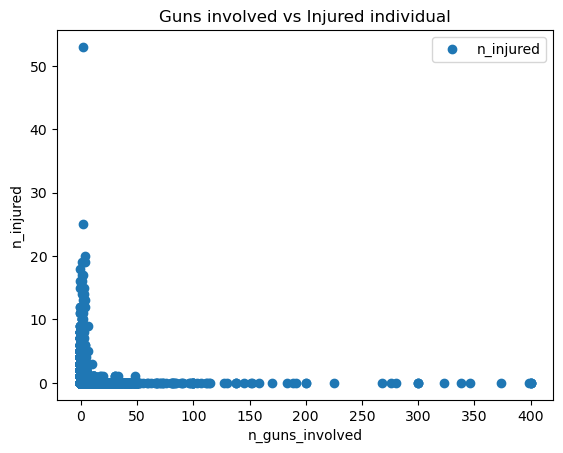

In [58]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df_sub.plot(x = 'n_guns_involved', y='n_injured',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Guns involved vs Injured individual')  
plt.xlabel('n_guns_involved')  
plt.ylabel('n_injured')  
plt.show()

#### Q5 
The hypothesis : The number of guns involved has no effect on the number of people injured.

In [59]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df_sub['n_guns_involved'].values.reshape(-1,1)
y = df_sub['n_injured'].values.reshape(-1,1)

In [60]:
X

array([[-1.],
       [-1.],
       [ 2.],
       ...,
       [ 1.],
       [ 1.],
       [ 2.]])

In [61]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#### Regression Analysis

In [62]:
# Create a regression object.
regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [63]:
# Fit the regression object onto the training set.
regression.fit(X_train, y_train)

LinearRegression()

In [64]:
# Predict the values of y using X.
y_predicted = regression.predict(X_test)

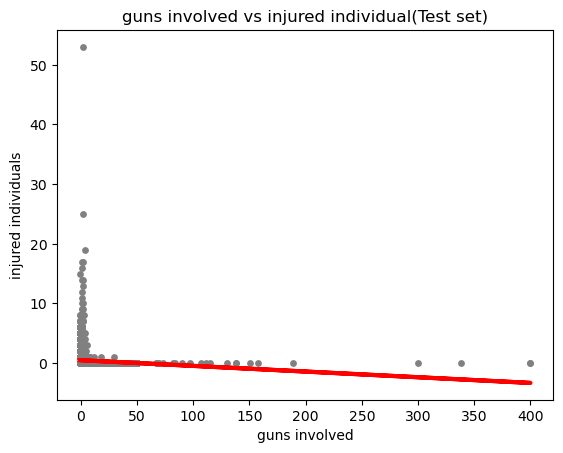

In [65]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('guns involved vs injured individual(Test set)')
plot_test.xlabel('guns involved')
plot_test.ylabel('injured individuals')
plot_test.show()

In [66]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [67]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.009523]]
Mean squared error:  0.5698186775591992
R2 score:  0.00208953065367945


In [68]:
y_predicted

array([[0.50786401],
       [0.48881801],
       [0.50786401],
       ...,
       [0.50786401],
       [0.50786401],
       [0.48881801]])

In [69]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,1,0.507864
1,1,0.488818
2,1,0.507864
3,1,0.507864
4,0,0.488818
5,0,0.488818
6,1,0.488818
7,0,0.488818
8,0,0.488818
9,1,0.507864


#### Q10 : Write your own interpretation of how well the line appears to fit the data in a markdown cell.
The line shows a slight downward slope but the overall pattern suggests no meaningful linear relationship between the number of guns involved and the number of people injured. This supports the hypothesis that the number of guns involved has little to no effect on the number of injuries in an incident.

#### compare how the regression fits the training set

In [70]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [71]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [72]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.009523]]
Mean squared error:  0.5151690222279242
R2 score:  0.002503714258286216


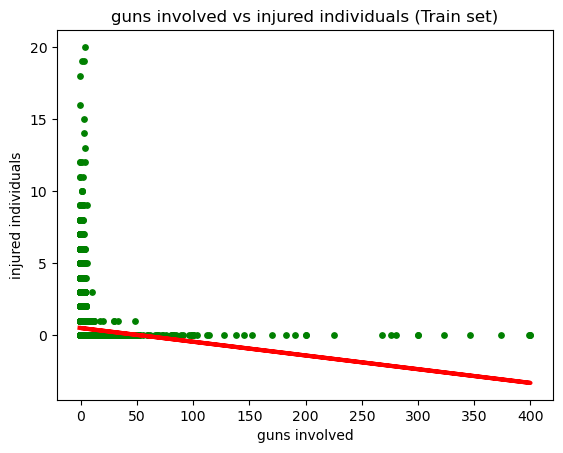

In [73]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('guns involved vs injured individuals (Train set)')
plot_test.xlabel('guns involved')
plot_test.ylabel('injured individuals')
plot_test.show()

### Bonus: performance improvement after removing outliers

In [74]:
# Clean the extreme values from the "n_killed" variable observed during the consistency checks.

df_test = df_sub[df_sub['n_guns_involved'] <=20] 

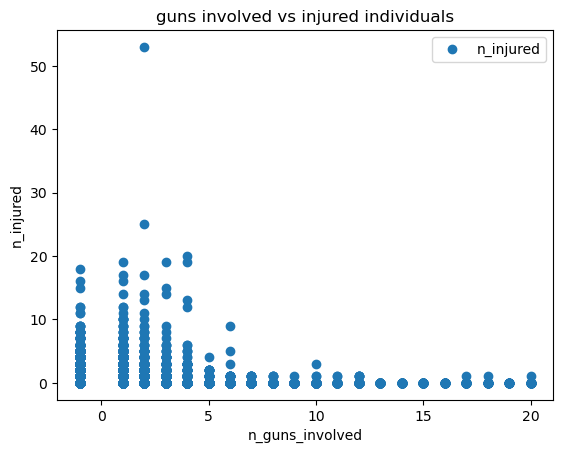

In [75]:
# See how the scatterplot looks without outliers.

df_test.plot(x = 'n_guns_involved', y='n_injured', style='o')  
plt.title('guns involved vs injured individuals')  
plt.xlabel('n_guns_involved')  
plt.ylabel('n_injured')  
plt.show()

In [76]:
# Reshape again.

X_2 = df_test['n_guns_involved'].values.reshape(-1,1)
y_2 = df_test['n_injured'].values.reshape(-1,1)

In [77]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.3, random_state=0)

In [78]:
# Run and fit the regression.

regression = LinearRegression()  
regression.fit(X_train_2, y_train_2)

LinearRegression()

In [79]:
# Predict.

y_predicted_2 = regression.predict(X_test_2)

In [80]:
rmse = mean_squared_error(y_test_2, y_predicted_2)
r2 = r2_score(y_test_2, y_predicted_2)

In [81]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.04491048]]
Mean squared error:  0.5183476983630191
R2 score:  0.007866482732881042


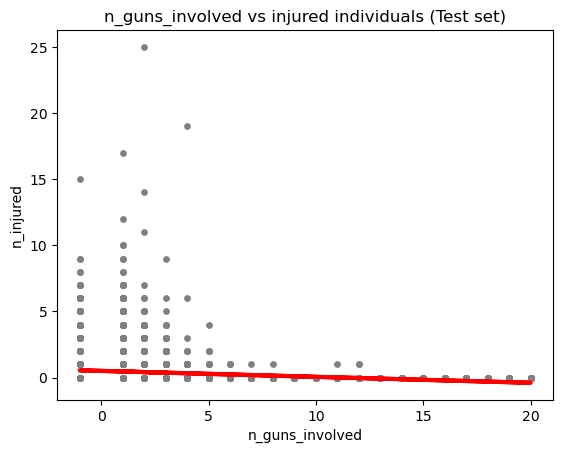

In [82]:
# Visualizing the test set results.
plot_test = plt
plot_test.scatter(X_test_2, y_test_2, color='gray', s = 15)
plot_test.plot(X_test_2, y_predicted_2, color='red', linewidth =3)
plot_test.title('n_guns_involved vs injured individuals (Test set)')
plot_test.xlabel('n_guns_involved')
plot_test.ylabel('n_injured')
plot_test.show()

In [83]:
data = pd.DataFrame({'Actual': y_test_2.flatten(), 'Predicted': y_predicted_2.flatten()})
data.head(30)

,Actual,Predicted
0,0,0.373084
1,0,0.462905
2,3,0.462905
3,0,0.462905
4,1,0.462905
5,0,0.462905
6,0,0.462905
7,0,0.462905
8,0,0.373084
9,0,0.552726


#### Q13

Include your thoughts on how well the model performed on the test set in a markdown cell.

Include any reflections you have on the impact of possible data bias.

The regression model performed poorly with an almost flat slope and an R² score close to zero. Predictions clustered narrowly while actual values varied widely. This reflects the highly skewed data where most incidents involve one gun and no injuries with rare extreme outliers. The imbalance biases the model toward underestimating severe cases. Overall, the number of guns alone is not a meaningful predictor of injuries.
